## Solving 2D Poisson Eqn with Periodic Boundary Conditions using PINNs
@author:  Sayantan 

Date :  27 March 2023

In [10]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import deepxde as dde
import numpy as np

# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Concatenate, Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Lambda
import matplotlib.pyplot as plt
from matplotlib import cm
np.random.seed(1234)
tf.random.set_seed(1234)

## The poisson's equation

$$
\begin{equation}
\nabla^2 \phi =  4 \pi G \rho
\end{equation} \tag{7}
$$
or rewriting interm of the field


\begin{equation}
\nabla \phi =  - \vec g 
% \nabla . \vec g = -4\pi G\rho
\end{equation}

$$
\begin{equation}
\nabla . \vec g = -4\pi G\rho
\end{equation}
$$

The density is 

$$
\begin{equation}
\rho = \rho_1 \cos(2\pi x/\lambda)
\end{equation}
$$

With periodic boundary conditions

$$
\begin{equation}
\phi(x=x_{min}) = \phi(x=x_{max})
\end{equation}
$$

$$
\begin{equation}
\partial_x \phi(x=x_{min}) =\partial_ \phi(x=x_{max})
\end{equation}
$$


$$
\begin{equation}
\phi(y=y_{min}) = \phi(y=y_{max})
\end{equation}
$$

$$
\begin{equation}
\partial_y \phi(y=y_{min}) =\partial_ \phi(y=y_{max})
\end{equation}
$$

In [3]:
## We test the solution of the POISSON's EQN 
#Set data type
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)
#%matplotlib inline

lam = 1.0          # one wavelength
const = 1 ## we set 4 pi G  tp 1
num_of_waves = 2

rho_1 = 0.03;       # question 2b non-linear wave propagation
rho_o = 1          # zeroth order density
def pdeTest(x, y):
    dy_xx = dde.grad.hessian(y, x,i=0,j=0)    
    
    dy_yy = dde.grad.hessian(y, x,i=1,j=1)
    
    return dy_xx + dy_yy - const*(rho_1 * tf.cos(2*np.pi*x[:, 0:1]/lam))
    
    # return dy_xx - const*(rho_1 * tf.cos(2*np.pi*x/lam))


Compiling model...
Building feed-forward neural network...
'build' took 0.137423 s



/home/sauddy3/PINNS-envcedar/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-03-29 18:39:56.592648: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 18:39:58.810582: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-03-29 18:39:58.812679: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4922 MB memory:  -> device: 0, nam

'compile' took 3.768171 s

Initializing variables...


2023-03-29 18:40:00.253529: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


Training model...



2023-03-29 18:40:00.895645: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x2b62800096d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-29 18:40:00.895784: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla P100-PCIE-12GB, Compute Capability 6.0
2023-03-29 18:40:01.101087: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-29 18:40:01.941457: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-29 18:40:03.965722: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                            Test loss                                             Test metric
0         [2.90e-03, 2.72e-01, 1.16e-02, 1.78e-02, 6.02e-03]    [2.90e-03, 2.72e-01, 1.16e-02, 1.78e-02, 6.02e-03]    []  


2023-03-29 18:40:07.307739: I tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:325] ptxas warning : Registers are spilled to local memory in function 'fusion_35'



1000      [4.36e-04, 6.84e-07, 2.55e-07, 5.65e-07, 4.07e-06]    [4.36e-04, 6.84e-07, 2.55e-07, 5.65e-07, 4.07e-06]    []  
2000      [4.18e-04, 2.21e-07, 9.12e-08, 1.94e-07, 1.51e-06]    [4.18e-04, 2.21e-07, 9.12e-08, 1.94e-07, 1.51e-06]    []  
3000      [4.12e-04, 7.85e-08, 8.13e-08, 1.75e-07, 1.18e-06]    [4.12e-04, 7.85e-08, 8.13e-08, 1.75e-07, 1.18e-06]    []  

Best model at step 3000:
  train loss: 4.14e-04
  test loss: 4.14e-04
  test metric: []

'train' took 23.234445 s

Compiling model...
'compile' took 0.809880 s



2023-03-29 18:40:25.114031: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


Training model...

Step      Train loss                                            Test loss                                             Test metric
3000      [4.12e-04, 7.85e-08, 8.13e-08, 1.75e-07, 1.18e-06]    [4.12e-04, 7.85e-08, 8.13e-08, 1.75e-07, 1.18e-06]    []  
4000      [1.54e-07, 5.86e-10, 5.68e-09, 3.23e-09, 1.37e-08]    [1.54e-07, 5.86e-10, 5.68e-09, 3.23e-09, 1.37e-08]        
5000      [1.85e-08, 1.76e-10, 3.92e-10, 1.19e-09, 1.02e-09]    [1.85e-08, 1.76e-10, 3.92e-10, 1.19e-09, 1.02e-09]        
6000      [2.40e-09, 2.21e-11, 3.95e-11, 2.41e-10, 2.52e-10]    [2.40e-09, 2.21e-11, 3.95e-11, 2.41e-10, 2.52e-10]        
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000000
  Number of iterations: 2657
  Number of functions evaluations: 3037
6037      [2.38e-09, 2.38e-11, 5.25e-11, 2.44e-10, 2.50e-10]    [2.38e-09, 2.38e-11, 5.25e-11, 2.44e-10, 2.50e-10]    []  

Best model at step 6037:

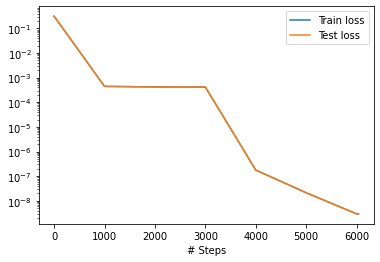

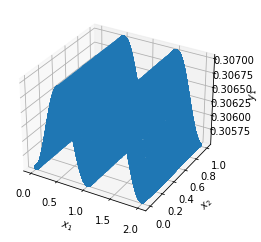

In [4]:
## The Geometric Domain 
xmin = 0
xmax = xmin + lam * num_of_waves


ymin= 0 
ymax= 1

# tmax= 3

geom = dde.geometry.Rectangle([xmin, ymin], [xmax, ymax])
# geom = dde.geometry.Interval(xmin, xmax)
# geom = dde.geometry.Interval(-1, 1)


## Boundaries

## Note in the deep XDE code by default for the periodic boundary u(0) = u(1)
## If the problem is periodic this condition will also satisfy u(-1) = u(1)
## Thus is most cases the left boundary is not needed. But we have the option here

def boundary_l(x, on_boundary):  # boundary x=-1 or x = 0 
    is_on_boundary_left = on_boundary and np.isclose(x[0], xmin)
    return is_on_boundary_left

def boundary_r(x, on_boundary):  # boundary x=1
    # is_on_boundary_right = on_boundary and np.isclose(x[0], xmax)
    is_on_boundary_right =  np.isclose(x[0], xmax)
    return is_on_boundary_right

def boundary_u(x, on_boundary):  # boundary x=1
    # is_on_boundary_up = on_boundary and np.isclose(x[1], ymax)
    is_on_boundary_up =  np.isclose(x[1], ymax)
    # print(is_on_boundary_up)
    return is_on_boundary_up

def boundary_d(x, on_boundary):  # boundary x=1
    is_on_boundary_lower = on_boundary and np.isclose(x[1], ymin)
    # print(is_on_boundary_up)
    return is_on_boundary_lower


bc_l = dde.icbc.PeriodicBC(geom, 0, boundary_l,derivative_order=0) ## may be used when x = [-1,1] otherwise for x =[0,1] not needed
bc_r = dde.icbc.PeriodicBC(geom, 0, boundary_r,derivative_order=0)

## 1st order terms

bc_ll = dde.icbc.PeriodicBC(geom, 0, boundary_l,derivative_order=1) ##may be used when x = [-1,1]
bc_rr = dde.icbc.PeriodicBC(geom, 0, boundary_r,derivative_order=1)


## Boundaries in 2D:

phixr =  dde.icbc.PeriodicBC(geom, 0, boundary_r,derivative_order=0)
# phixl =  dde.icbc.PeriodicBC(geom, 0, boundary_l,derivative_order=0)

phixrr = dde.icbc.PeriodicBC(geom, 0, boundary_r,derivative_order=1)

phiyu =  dde.icbc.PeriodicBC(geom, 1, boundary_u,derivative_order=0)

phiyuu = dde.icbc.PeriodicBC(geom, 1, boundary_u,derivative_order=1)
# phiyd =  dde.icbc.PeriodicBC(geom, 1, boundary_d,derivative_order=0)



data = dde.data.TimePDE(geom,
                     pdeTest,
                     # [phixr,phiyu], ## This is needed if one need to force periodicity on the left 
                     [phixr,phiyu,phixrr,phiyuu],
                        # [phixr,phixl,phiyu,phiyd],          ## For x =[0,1] and default
                     num_domain=10000,
                     num_boundary=5000
                     #num_initial=5000,
                    # num_test=10000,
                   )

net = dde.nn.FNN([2] + [32] * 3 + [1], "sin", "Glorot normal")
model_test = dde.Model(data, net)

model_test.compile("adam", lr=1e-3)
model_test.train(iterations=3000)
model_test.compile("L-BFGS")


losshistory, train_state = model_test.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

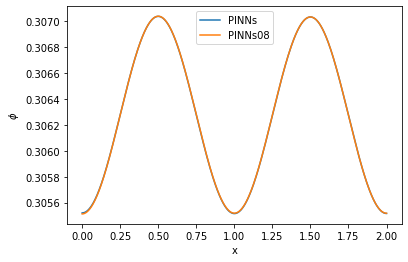

In [5]:
## Plotting at y= 0.5 and  y= 0.8 slice

X = np.linspace(xmin,xmax,1000).reshape(1000, 1)
Y_05 = 0.5*np.ones(1000).reshape(1000, 1)
Y_08 = 0.8*np.ones(1000).reshape(1000, 1)

X_05 = np.hstack((X, Y_05))
X_08 = np.hstack((X, Y_08))
output_05 = model_test.predict(X_05)
output_08 = model_test.predict(X_08)


plt.plot(X,output_05,label="PINNs")
plt.plot(X,output_08,label="PINNs08")
plt.ylabel(r"$\phi$")
plt.xlabel("x")
plt.legend()


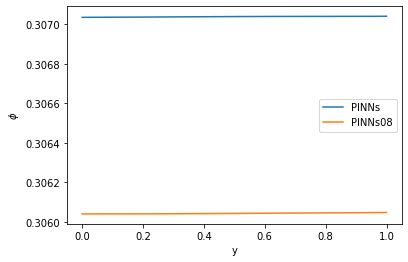

In [8]:
## Plotting at x= 0.5 and  x= 0.8 slice

X = np.linspace(xmin,xmax,1000).reshape(1000)


Y = np.linspace(0,ymax,1000).reshape(1000, 1)
X_05 = 0.5*np.ones(1000).reshape(1000, 1)
X_08 = 0.8*np.ones(1000).reshape(1000, 1)

Y_05 = np.hstack((X_05, Y))
Y_08 = np.hstack((X_08, Y))
output_Y05 = model_test.predict(Y_05)
output_Y08 = model_test.predict(Y_08)


plt.plot(Y,output_Y05,label="PINNs")
plt.plot(Y,output_Y08,label="PINNs08")
plt.ylabel(r"$\phi$")
plt.xlabel("y")
plt.legend()

(400, 2)
(20, 20)
(20, 20)


Text(0.5, 0, '$\\phi$')

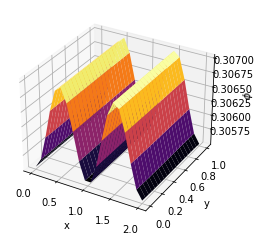

In [15]:
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

# Make the X, Y meshgrid instead of np.tile
xs = np.linspace(0, xmax, 20)
ys = np.linspace(0, ymax, 20)
tau, phi = np.meshgrid(xs, ys) 
Xgrid = np.vstack([tau.flatten(),phi.flatten()]).T
print(np.shape(Xgrid))
# Z evaluation
# amp = np.sin(tau+phi) 
output = model_test.predict(Xgrid)
test = output.reshape(20,20)

print(np.shape(tau))
print(np.shape(test))

surf = ax3d.plot_surface(tau, phi, test,cmap=cm.inferno)
ax3d.set_xlabel("x")
ax3d.set_ylabel("y")
ax3d.set_zlabel(r"$\phi$",labelpad=1)
# fig.colorbar(surf)

## The analytic solution to the poisson Eqn can be obtained using fft methods

In [20]:
def fft_solver(rho,Lx,Ly,N, dim = None):
    
    '''
    A FFT solver that uses discrete Fast Fourier Transform to
    solve the poisson Equation:
    We apply the correction due to the finite difference grid of phi
    
    Input: 1. The source function: density in this case
           2. # of grid point N
           3. Domain Size in each dimension
    
    Output: the potential phi and the field g 
    
    '''
    nx = N
    Lx = Lx
    ny =nx
    dx = Lx / nx
    dy = Ly / nx
    
    # Calculate the Fourier modes of the gas density
    rhohat = fft(rho)

    # Calculate the wave numbers in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, dx)
    ky = 2 * np.pi * np.fft.fftfreq(ny, dy)

#     # Construct the Laplacian operator in Fourier space
#     kx2 = np.meshgrid(kx**2)
#     ky2 = np.meshgrid(ky**2)
    
    # Construct the Laplacian operator in Fourier space
    kx2, ky2 = np.meshgrid(kx**2, ky**2)
    laplace = -(kx2 + ky2)

    laplace[laplace == 0] = 1e-16
    
    # Solve for the gravitationa potential in Fourier space
    phihat = rhohat / laplace
    
    phihat = rhohat * dx**2/laplace
#     window = signal.windows.tukey(len(phihat),alpha=0.25)


    # Transform back to real space to obtain the solution
#     phi = np.real(ifft(phihat*window))
    phi = np.real(ifft(phihat))
    
    ## The field ,i.e., gravity 
    dphidx = np.gradient(phi, dx)

    dphidy = np.gradient(phi, dy)
    return phi,dphidx, dphidy 

In [22]:
# from numpy.fft import fft, ifft
# from scipy import signal
# L = lam * num_of_waves   
# Ly = 1  
# N = 1000
# x = np.linspace(0, L, N)
# rho = rho_1 * np.cos(2*np.pi*x/lam)

# phi, dpidx , dphidy  = fft_solver(const*(rho),L,Ly,N, dim = None)
# plt.plot(x,phi,label="FFT")
# plt.ylabel(r"$\phi$")
# plt.xlabel("x")
# plt.legend()

In [23]:
import numpy as np
from numpy.fft import fft2, ifft2
from matplotlib import cm
import matplotlib.pyplot as plt


# Define the problem domain and grid spacing
Lx, Ly = 2.0, 1.0
nx, ny = 128, 128
dx, dy = Lx / nx, Ly / ny

# Define the charge density rho(x,y)
x, y = np.meshgrid(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny))
#rho = np.sin(2 * np.pi * x) * np.sin(2 * np.pi * y)


xs = np.linspace(0, 2*np.pi, 200)
ys = np.linspace(0, 2*np.pi, 200)
tau, phi = np.meshgrid(xs, ys) 
# Z evaluation
# amp = np.sin(tau+phi) 
amp = np.sin(tau) 

rho = np.cos(2 * np.pi * x)


# Calculate the Fourier modes of the charge density
rhohat = fft2(rho)

# Calculate the wave numbers in x and y directions
kx = 2 * np.pi * np.fft.fftfreq(nx, dx)
ky = 2 * np.pi * np.fft.fftfreq(ny, dy)

# Construct the Laplacian operator in Fourier space
kx2, ky2 = np.meshgrid(kx**2, ky**2)
laplace = -(kx2 + ky2)

laplace[laplace == 0] = 1e-9

# Solve for the electrostatic potential in Fourier space
phihat = rhohat / laplace

# Transform back to real space to obtain the solution
phi = np.real(ifft2(phihat))

# Print the solution
# print(phi)

[[7812499.97271525 7812499.97295739 7812499.97344037 ... 7812499.97344037
  7812499.97295739 7812499.97271525]
 [7812499.97271525 7812499.97295739 7812499.97344037 ... 7812499.97344037
  7812499.97295739 7812499.97271525]
 [7812499.97271525 7812499.97295739 7812499.97344037 ... 7812499.97344037
  7812499.97295739 7812499.97271525]
 ...
 [7812499.97271525 7812499.97295739 7812499.97344037 ... 7812499.97344037
  7812499.97295739 7812499.97271525]
 [7812499.97271525 7812499.97295739 7812499.97344037 ... 7812499.97344037
  7812499.97295739 7812499.97271525]
 [7812499.97271525 7812499.97295739 7812499.97344037 ... 7812499.97344037
  7812499.97295739 7812499.97271525]]


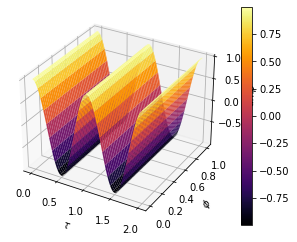

In [24]:
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

 

ax3d.set_xlabel(r'$\tau$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$\phi$')  # phi -> phase
ax3d.set_zlabel(r'$\rho$')   # signal amplitude

surf = ax3d.plot_surface(x, y, rho,cmap=cm.inferno)
fig.colorbar(surf)

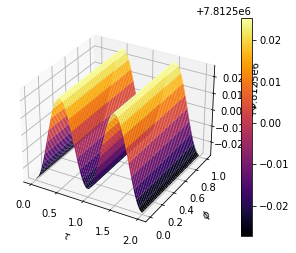

In [26]:
fig = plt.figure()
ax3d = fig.add_subplot(111, projection='3d')

 

ax3d.set_xlabel(r'$\tau$')  # tau = omega*t -> adimensional time
ax3d.set_ylabel(r'$\phi$')  # phi -> phase
ax3d.set_zlabel(r'$\Phi$')   # signal amplitude

surf = ax3d.plot_surface(x, y, phi,cmap=cm.inferno)
fig.colorbar(surf)